# ch04 - Advanced Matplotlib
---

# Drawing subplots

## Initiating a figure with `plt.figure()`

## Initiating subplots as axes with `plt.subplot()`

In [1]:
import matplotlib.pyplot as plt
# Initiates a figure area for plotting
fig = plt.figure()

# Initiates six subplot axes
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

# Print the type of ax1
print(type(ax1))

# Label each subplot with corresponding identities
ax1.text(0.3,0.5,'231',fontsize=18)
ax2.text(0.3,0.5,'232',fontsize=18)
ax3.text(0.3,0.5,'233',fontsize=18)
ax4.text(0.3,0.5,'234',fontsize=18)
ax5.text(0.3,0.5,'234',fontsize=18)
ax6.text(0.3,0.5,'236',fontsize=18)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


## Adding subplots with `plt.figure.add_subplot()`

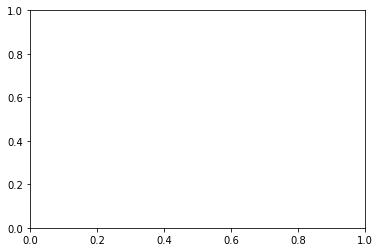

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111) 

plt.show()

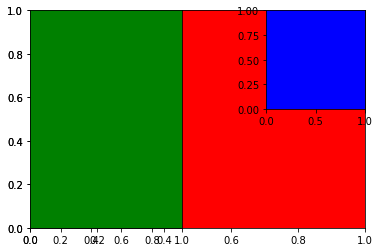

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111,facecolor='red')
ax2 = fig.add_subplot(121,facecolor='green')
ax3 = fig.add_subplot(233,facecolor='blue')

plt.show()

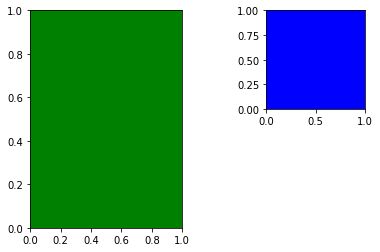

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure() # Note this line is optional here
ax1 = plt.subplot(111,facecolor='red')
ax2 = plt.subplot(121,facecolor='green')
ax3 = plt.subplot(233,facecolor='blue')

plt.show()

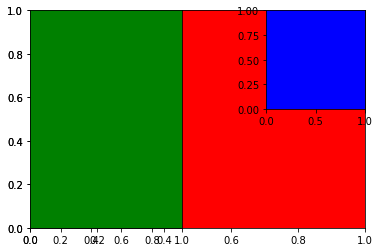

In [5]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(111,facecolor='red')
fig = plt.gcf() # get current figure
ax2 = fig.add_subplot(121,facecolor='green')
ax3 = fig.add_subplot(233,facecolor='blue')

plt.show()

## Initiating an array of subplots with `plt.subplots()`

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


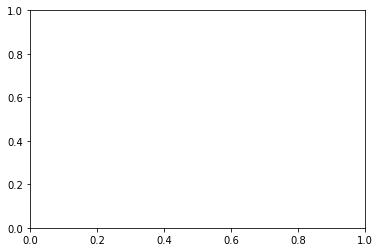

In [6]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(1,1)
print(type(fig))
print(type(axarr))

plt.show()

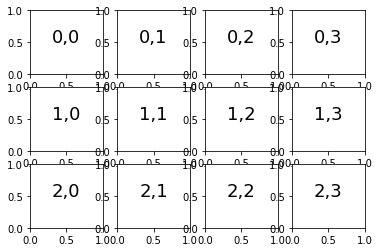

In [7]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(3,4)
for i in range(3):
    for j in range(4):
        axarr[i][j].text(0.3,0.5,str(i)+','+str(j),fontsize=18)

plt.show()

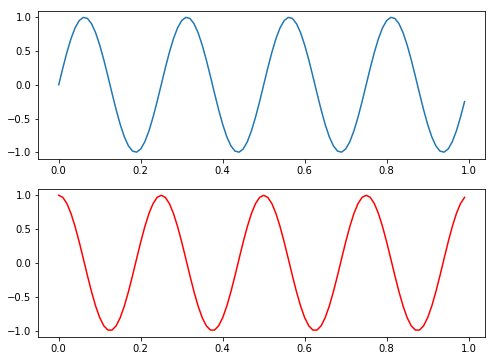

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.01)
y1 = np.sin(8*np.pi*x)
y2 = np.cos(8*np.pi*x)

# Draw 1x2 subplots
fig, axarr = plt.subplots(2,figsize=(8,6))

axarr[0].plot(x,y1)
axarr[1].plot(x,y2,'red')

plt.show()

### Shared axes

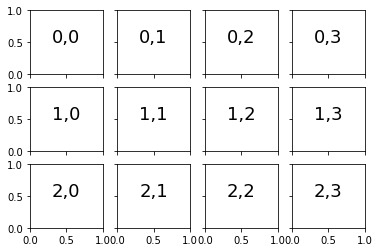

In [9]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(3,4,sharex=True,sharey=True)
for i in range(3):
    for j in range(4):
        axarr[i][j].text(0.3,0.5,str(i)+','+str(j),fontsize=18)

plt.show()

## Setting margin with `plt.tight_layout()`

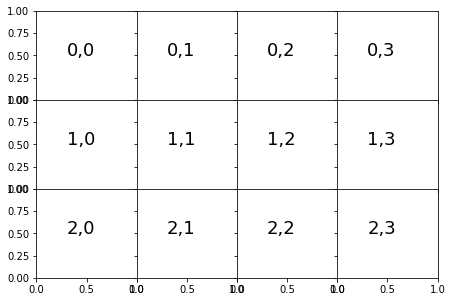

In [10]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(3,4,sharex=True,sharey=True)
for i in range(3):
    for j in range(4):
        axarr[i][j].text(0.3,0.5,str(i)+','+str(j),fontsize=18)

plt.tight_layout(pad=0, w_pad=-1.6, h_pad=-1)

## Aligning subplots of different dimensions with `plt.subplot2grid()`

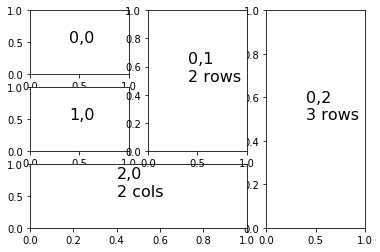

In [11]:
import matplotlib.pyplot as plt

axarr = []
axarr.append(plt.subplot2grid((3,3),(0,0)))
axarr.append(plt.subplot2grid((3,3),(1,0)))
axarr.append(plt.subplot2grid((3,3),(0,2), rowspan=3))
axarr.append(plt.subplot2grid((3,3),(2,0), colspan=2))
axarr.append(plt.subplot2grid((3,3),(0,1), rowspan=2))

axarr[0].text(0.4,0.5,'0,0',fontsize=16)
axarr[1].text(0.4,0.5,'1,0',fontsize=16)
axarr[2].text(0.4,0.5,'0,2\n3 rows',fontsize=16)
axarr[3].text(0.4,0.5,'2,0\n2 cols',fontsize=16)
axarr[4].text(0.4,0.5,'0,1\n2 rows',fontsize=16)

plt.show()

## Drawing inset plots with `fig.add_axes()`

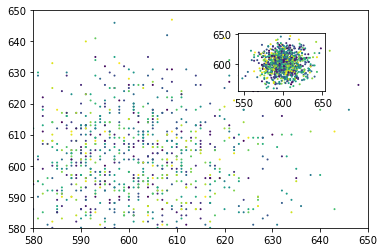

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
np.random.seed(100)
# Prepare data
x = np.random.binomial(1000,0.6,1000)
y = np.random.binomial(1000,0.6,1000)
c = np.random.rand(1000)

# Draw the parent plot
ax = plt.scatter(x,y,s=1,c=c)
plt.xlim(580,650)
plt.ylim(580,650)

# Draw the inset subplot
ax_new = fig.add_axes([0.6, 0.6, 0.2, 0.2])
plt.scatter(x,y,s=1,c=c)
plt.show()

---
# Adjusting axis and ticks

## Using non-linear axis scale

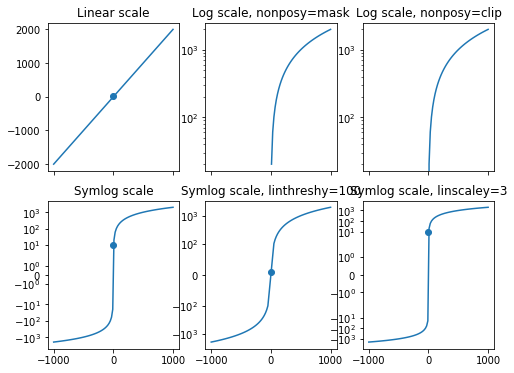

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare 100 evenly spaced numbers from -200 to 200
x = np.linspace(-1000, 1000, 100)
y = x * 2
# Setup subplot with 3 rows and 2 columns, with shared x-axis.
# More details about subplots will be discussed in Chapter 3.
f, axarr = plt.subplots(2,3, figsize=(8,6), sharex=True)
for i in range(2):
    for j in range(3):
        axarr[i,j].plot(x, y)
        # Horizontal line (y=10)
        axarr[i,j].scatter([0], [10])

# Linear scale
axarr[0,0].set_title('Linear scale')

# Log scale, mask non-positive numbers
axarr[0,1].set_title('Log scale, nonposy=mask')
axarr[0,1].set_yscale('log', nonposy='mask')

# Log scale, clip non-positive numbers
axarr[0,2].set_title('Log scale, nonposy=clip')
axarr[0,2].set_yscale('log', nonposy='clip')

# Symlog
axarr[1,0].set_title('Symlog scale')
axarr[1,0].set_yscale('symlog')

# Symlog scale, expand the linear range to -100,100 (default=None)
axarr[1,1].set_title('Symlog scale, linthreshy=100')
axarr[1,1].set_yscale('symlog', linthreshy=100)

# Symlog scale, expand the linear scale to 3 (default=1)
# The linear region is expanded, while the log region is compressed.
axarr[1,2].set_title('Symlog scale, linscaley=3')
axarr[1,2].set_yscale('symlog', linscaley=3)
plt.show()

# More on Pandas-Matplotlib integration

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
# Weekly earnings of U.S. wage workers in 2016, by age
# Downloaded from Statista.com
# Source URL: https://www.statista.com/statistics/184672/median-weekly-earnings-of-full-time-wage-and-salary-workers/
us_agegroups = [22,29.5,39.5,49.5]
# Convert to a rough estimation of monthly earnings by multiplying 4
us_incomes = [x*4 for x in [513,751,934,955]]

# Monthly salary in the Netherlands in 2016 per age group excluding overtime (Euro)
# Downloaded from Statista.com 
# Source URL: https://www.statista.com/statistics/538025/average-monthly-wage-in-the-netherlands-by-age/
# take the centre of each age group
nl_agegroups = [22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5]
nl_incomes = [x*1.113 for x in [1027, 1948, 2472, 2795, 2996, 3069, 3070]]

# Median monthly wage analysed by sex, age group, educational attainment, occupational group and industry section
# May-June 2016 (HKD)
# Downloaded form the website of Censor and Statistics Department of the HKSAR government
# Source URL: https://www.censtatd.gov.hk/fd.jsp?file=D5250017E2016QQ02E.xls&product_id=D5250017&lang=1
hk_agegroups = [19.5, 29.5, 39.5, 49.5]
hk_incomes = [x/7.770 for x in [11900,16800,19000,16600]]

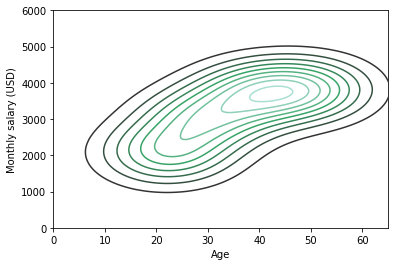

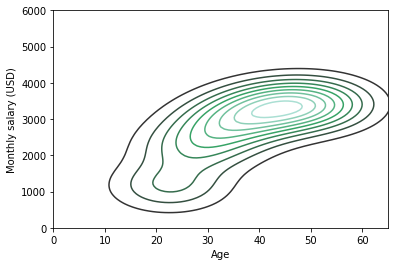

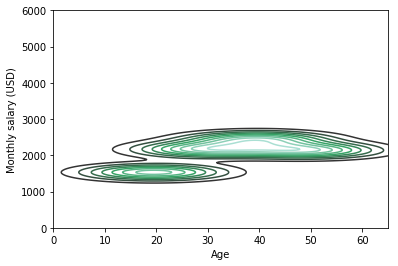

In [15]:
import seaborn as sns
def kdeplot_income_vs_age(agegroups,incomes):
    plt.figure()
    sns.kdeplot(agegroups,incomes)
    plt.xlim(0,65)
    plt.ylim(0,6000)
    plt.xlabel('Age')
    plt.ylabel('Monthly salary (USD)')
    return

kdeplot_income_vs_age(us_agegroups,us_incomes)
kdeplot_income_vs_age(nl_agegroups,nl_incomes)
kdeplot_income_vs_age(hk_agegroups,hk_incomes)

## Showing density of bivariate data with hexbin plots

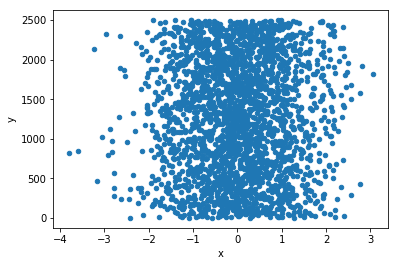

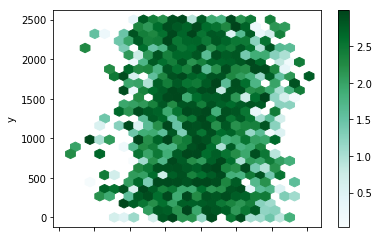

In [16]:
import pandas as pd
import numpy as np
# Prepare 2500 random data points densely clustered at center
np.random.seed(123)

df = pd.DataFrame(np.random.randn(2500, 2), columns=['x', 'y'])
df['y'] = df['y'] = df['y'] + np.arange(2500)
df['z'] = np.random.uniform(0, 3, 2500)

# Plot the scatter plot
ax1 = df.plot.scatter(x='x', y='y')
# Plot the hexbin plot
ax2 = df.plot.hexbin(x='x', y='y', C='z', reduce_C_function=np.max,gridsize=25)

plt.show()

# Expanding plot types with Seaborn 

## Visualizing multivariate data with Heatmap

In [17]:
# Data obtained from https://ark.intel.com/#@Processors
import pandas as pd

cpuspec = pd.read_csv('intel-cpu-7+8.csv').set_index('Name')
print(cpuspec.info())
cpuspec.head()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, i7-8809G to m3-7Y30
Data columns (total 5 columns):
Core              65 non-null int64
Max Frequency     49 non-null float64
Base Frequency    65 non-null float64
Cache             65 non-null int64
Gen               65 non-null int64
dtypes: float64(2), int64(3)
memory usage: 3.0+ KB
None


,Core,Max Frequency,Base Frequency,Cache,Gen
Name,,,,,
i7-8809G,4,4.2,3.1,8,8
i7-8709G,4,4.1,3.1,8,8
i7-8706G,4,4.1,3.1,8,8
i7-8705G,4,4.1,3.1,8,8
i7-8700K,6,4.7,3.7,12,8


In [18]:
cpuspec['Max Frequency'] = cpuspec['Max Frequency'].fillna(cpuspec['Base Frequency'])

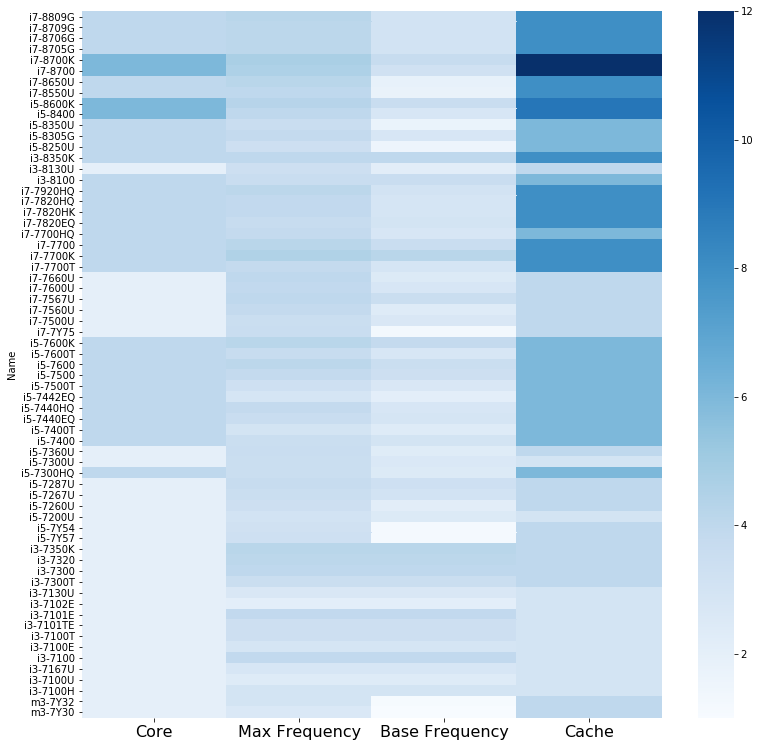

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,13))
sns.heatmap(cpuspec.drop(['Gen'],axis=1),cmap='Blues')
plt.xticks(fontsize=16)
plt.show()

## Showing hierarchy in multivariate data with `clustermap`

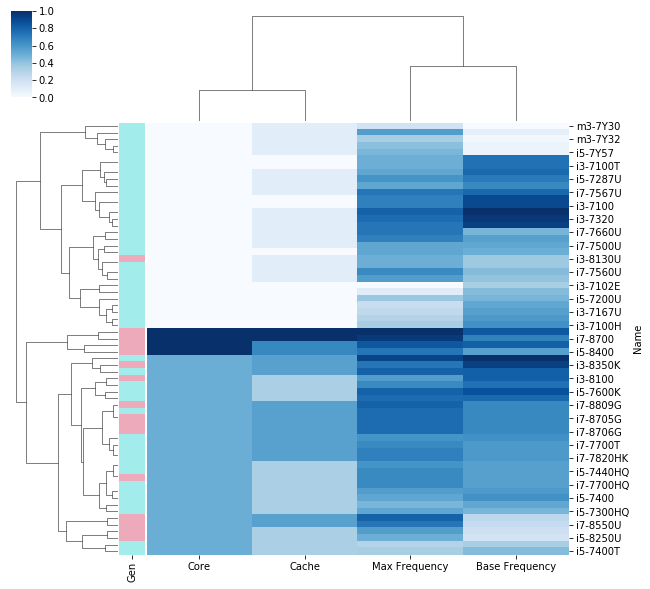

In [21]:
import seaborn as sns

row_colors = cpuspec['Gen'].map({7:'#a2ecec',8:'#ecaabb'}) # map color values to generation
sns.clustermap(cpuspec.drop(['Gen'],axis=1),standard_scale=True,cmap='Blues',row_colors=row_colors);

In [23]:
from scipy.cluster import hierarchy
from scipy.spatial import distance
import seaborn as sns

def pairwise_clustermap(df,method='average',metric='cityblock',figsize=(13,13),cmap='viridis',**kwargs):
    correlations_array = np.asarray(df.corr())

    row_linkage = hierarchy.linkage(
        distance.pdist(correlations_array), method=method)

    col_linkage = hierarchy.linkage(
        distance.pdist(correlations_array.T), method=method)

    g = sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, \
        method=method, metric=metric, figsize=figsize, cmap=cmap,**kwargs)
    return g

# Image plotting

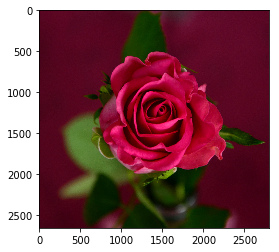

In [24]:
import matplotlib.pyplot as plt
# Source image downloaded under CC0 license: Free for personal and commercial use. No attribution required.
# Source image address: https://static.pexels.com/photos/15241/flower-roses-red-roses-bloom.jpg
img = plt.imread('ch04.img/mpldev_ch04_rose.jpg')
plt.imshow(img)

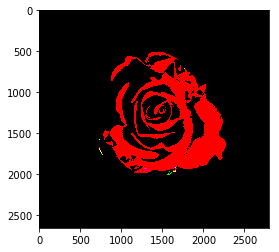

In [25]:
# create a copy because the image object from `plt.imread()` is read-only
imgcopy = img.copy() 
imgcopy[img<160] = 0
imgcopy[img>=160] = 255
plt.imshow(imgcopy)
plt.show()

In [26]:
from keras.datasets import mnist

Using TensorFlow backend.


In [27]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [28]:
for d in X_train, y_train, X_test, y_test:
    print(d.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


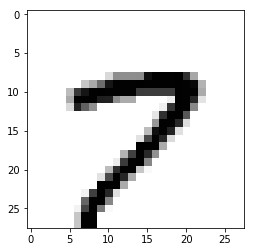

In [29]:
plt.imshow(X_train[123], cmap='gray_r')

# Financial plotting

In [5]:
import pandas as pd
# downloaded from kaggle "Cryptocurrency Market Data" dataset curated by user jvent
# Source URL: https://www.kaggle.com/jessevent/all-crypto-currencies
crypt = pd.read_csv('crypto-markets.csv')
print(crypt.shape)
crypt.head()

(679183, 13)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [6]:
from matplotlib.dates import date2num
btc = crypt[crypt['symbol']=='BTC'][['date','open','high','low','close']].set_index('date',drop=False)
btc['date'] = pd.to_datetime(btc['date'], format='%Y-%m-%d').apply(date2num)
btc.index = pd.to_datetime(btc.index, format='%Y-%m-%d')
btc = btc['2017-12-01':'2017-12-31']
btc = btc[['date','open','high','low','close']]

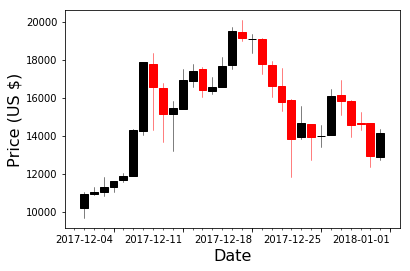

In [8]:
import matplotlib.pyplot as plt
from matplotlib.dates import WeekdayLocator, DayLocator, DateFormatter, MONDAY
from mpl_finance import candlestick_ohlc
# from matplotlib.finance import candlestick_ohlc deprecated in 2.0 and removed in 2.2
fig, ax = plt.subplots()

candlestick_ohlc(ax,btc.values,width=0.8)
ax.xaxis_date() # treat the x data as dates
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY)) # major ticks on the mondays
ax.xaxis.set_minor_locator(DayLocator()) # minor ticks on the days
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Align the xtick labels
plt.setp(ax.get_xticklabels(), horizontalalignment='right')

# Set x-axis label
ax.set_xlabel('Date',fontsize=16) 

# Set y-axis label
ax.set_ylabel('Price (US $)',fontsize=16) 
plt.show()

# 3D plots with Axes3D

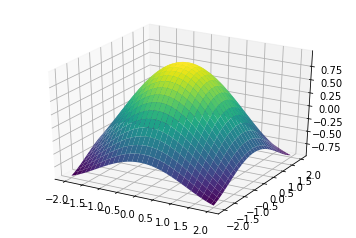

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 60)
y = np.linspace(-2, 2, 60)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)
z = np.cos(r)
surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap='viridis', linewidth=0)

# Geographical plotting

## Basemap

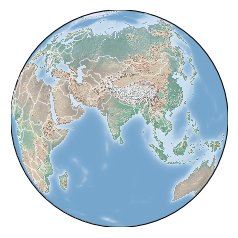

In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Initialize a Basemap object
# Use orthogonal spherical projection
# Adjust the focus by setting the latitude and longitude
map = Basemap(projection='ortho', lat_0=20, lon_0=80)

# To shade terrain by relief. This step may take some time.
map.shadedrelief()

# Draw the country boundaries in white
map.drawcountries(color='white')
plt.show()

## GeoPandas

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [39]:
# Downloaded from the Climate Change Knowledge portal by the World Bank Group
# Source URL: http://climate4development.worldbank.org/open/#precipitation
world_pr = gpd.read_file('futureB.ppt.totals.median.shp')
world_pr.head()

,ANNUAL,FID,ANN90,ANN10,UNCERTAIN,UCP,geometry
0,27.169403,0_0,43.493927,-9.617419,53.11,1.95,"POLYGON ((-181 -81, -181 -79, -179 -79, -179 -..."
1,29.888596,1_0,46.822582,-10.193469,57.02,1.91,"POLYGON ((-179 -81, -179 -79, -177 -79, -177 -..."
2,32.919357,2_0,51.010445,-10.960211,61.97,1.88,"POLYGON ((-177 -81, -177 -79, -175 -79, -175 -..."
3,36.056152,3_0,52.492485,-11.570847,64.06,1.78,"POLYGON ((-175 -81, -175 -79, -173 -79, -173 -..."
4,38.931015,4_0,52.384979,-12.343842,64.73,1.66,"POLYGON ((-173 -81, -173 -79, -171 -79, -171 -..."


In [40]:
# Downloaded from thematicmapping.org
# Source URL http://thematicmapping.org/downloads/world_borders.php
world_borders = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.3.shp')
world_borders.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,(POLYGON ((-61.68666800000003 17.0244410000001...
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.963610000000017 36.802216, 4.78583..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,(POLYGON ((45.08332252502441 39.76804542541504...
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621399999998 41.02106500000001,..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387153625488 41.1986026763916, ..."


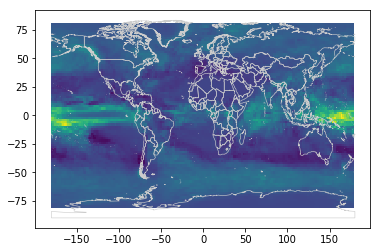

In [41]:
# Initialize an figure and an axes as the canvas
fig,ax = plt.subplots()

# Plot the annual precipitation data in ax
world_pr.plot(ax=ax,column='ANNUAL')

# Draw the simple worldmap borders
world_borders.boundary.plot(ax=ax,color='#cccccc',linewidth=0.6)

plt.show()